<a href="https://colab.research.google.com/github/uichann/My_Repository/blob/main/%EB%AA%A8%EA%B7%B8_model_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from collections import defaultdict
import os, random

from scipy import sparse
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
from torch.nn.init import normal_
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

import plotnine
from plotnine import *

import seaborn as sns



In [ ]:
dmg = pd.read_excel("/content/drive/MyDrive/sample_data_MORG.xlsx")

In [ ]:
print(dmg['체지방률'].isnull().sum(),dmg['BMI'].isnull().sum())

573 47


In [ ]:
dmg.columns

Index(['HUMAN ID', '성별', '나이', '키', '가슴너비', '허리너비', '엉덩이너비', '가슴두께', '허리두께',
       '엉덩이두께', '가슴둘레', '허리둘레', '배둘레', '엉덩이둘레', '어깨너비', '장딴지둘레', '종아리최소둘레',
       '몸무게', '골격근량', '체지방량', 'BMI', '체지방률'],
      dtype='object')

In [ ]:
data = dmg[['성별','나이','키','몸무게','가슴너비','허리너비','엉덩이너비','어깨너비','BMI','가슴둘레','허리둘레','종아리최소둘레','엉덩이둘레','체지방률']].reset_index(drop = True)


In [ ]:
data.columns = ['Sex','Age','Heigt','weight','Chest_wid','waist_wid','hip_wid','shoul_wid','BMI','bust','waist_cir','calf_cir','hip_cir','body_fat']

In [ ]:
data['Sex'] = data['Sex'].map({'남': 1, '여': 0})

In [ ]:
data

,Sex,Age,Heigt,weight,Chest_wid,waist_wid,hip_wid,shoul_wid,BMI,bust,waist_cir,calf_cir,hip_cir,body_fat
0,1,7,1330.000000,31.6,206.000000,198.000000,239.0,276.0,17.9,670.0,624.000000,181.0,727.0,29.3
1,1,7,1160.000000,19.4,179.000000,148.000000,198.0,235.0,14.4,581.0,498.000000,150.0,572.0,12.7
2,1,7,1243.000000,23.6,208.000000,195.000000,216.0,286.0,15.4,617.0,543.000000,161.0,627.0,16.3
3,1,7,1144.000000,19.9,206.000000,173.000000,200.0,260.0,15.3,578.0,500.000000,160.0,602.0,20.2
4,1,7,1277.000000,37.1,235.930615,238.363337,255.0,310.0,22.7,735.0,703.480356,199.0,770.0,34.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,0,13,1632.000000,52.1,252.000000,215.000000,320.0,335.0,19.6,804.0,664.000000,212.0,916.0,24.2
4872,0,13,1394.498785,30.1,214.000000,196.000000,253.0,296.0,15.6,693.0,574.000000,182.0,728.0,20.9
4873,0,13,1527.000000,48.0,242.000000,222.000000,304.0,335.0,20.5,788.0,662.000000,209.0,844.0,27.9
4874,0,13,1457.000000,34.6,217.000000,206.000000,268.0,315.0,16.2,675.0,600.000000,194.0,748.0,19.9


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Sex          0
Age          0
Heigt        0
weight       0
Chest_wid    0
waist_wid    0
hip_wid      0
shoul_wid    0
BMI          0
bust         0
waist_cir    0
calf_cir     0
hip_cir      0
body_fat     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4270 entries, 0 to 4875
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sex        4270 non-null   int64  
 1   Age        4270 non-null   int64  
 2   Heigt      4270 non-null   float64
 3   weight     4270 non-null   float64
 4   Chest_wid  4270 non-null   float64
 5   waist_wid  4270 non-null   float64
 6   hip_wid    4270 non-null   float64
 7   shoul_wid  4270 non-null   float64
 8   BMI        4270 non-null   float64
 9   bust       4270 non-null   float64
 10  waist_cir  4270 non-null   float64
 11  calf_cir   4270 non-null   float64
 12  hip_cir    4270 non-null   float64
 13  body_fat   4270 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 500.4 KB


In [ ]:
data.describe()

,Sex,Age,Heigt,weight,Chest_wid,waist_wid,hip_wid,shoul_wid,BMI,bust,waist_cir,calf_cir,hip_cir,body_fat
count,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000
mean,0.495316,10.409836,1414.347011,37.888979,231.155423,214.595975,257.674828,306.451867,18.482815,716.713775,627.295896,192.731419,755.983934,23.674022
std,0.500037,1.906259,130.932772,11.831599,28.911561,32.328206,34.093167,32.367040,3.275249,88.397730,92.744063,21.304182,98.029099,7.718804
min,0.000000,7.000000,1050.041093,16.800000,163.000000,140.000000,177.000000,213.000000,12.200000,506.000000,439.000000,140.000000,515.000000,7.000000
25%,0.000000,9.000000,1315.000000,28.600000,210.000000,191.000000,231.000000,283.000000,16.000000,650.000000,559.000000,177.000000,680.000000,17.800000
50%,0.000000,11.000000,1417.000000,36.200000,229.000000,210.000000,256.000000,305.000000,17.800000,708.500000,610.500000,192.000000,750.000000,22.500000
75%,1.000000,12.000000,1516.000000,45.300000,250.000000,234.000000,283.000000,330.000000,20.300000,775.000000,680.000000,208.000000,827.000000,29.000000
max,1.000000,13.000000,1817.000000,88.300000,337.000000,340.106879,365.000000,419.000000,32.000000,1071.260883,1009.000000,271.796857,1070.000000,51.500000


In [ ]:
import warnings
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(data.columns):
    sns.distplot(data[i],ax=ax[index,0])
    sns.boxplot(data[i],ax=ax[index,1])
    stats.probplot(data[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=50)

In [ ]:
print(f'-------Column Skewness------\n{data.skew(axis=0).sort_values()}')#왜도

-------Column Skewness------
Age         -0.281994
Heigt       -0.038470
Sex          0.018743
shoul_wid    0.160072
hip_wid      0.194356
calf_cir     0.213204
hip_cir      0.238475
Chest_wid    0.383876
bust         0.478236
body_fat     0.496705
waist_wid    0.606017
weight       0.712383
waist_cir    0.868106
BMI          0.901874
dtype: float64


In [ ]:
from scipy import stats

testresult = np.array(['Columns','Shapiro-test result'])
for col in data.columns:
    shapiro_test = stats.shapiro(data[col])[1]
    temp = [col, shapiro_test]
    
    testresult = np.vstack((testresult, temp))

In [ ]:
pd.DataFrame(testresult, columns=['Feature','Shapiro-test result'])[1:] #p-value >alpha= 0.05 귀무가설 정규분포

,Feature,Shapiro-test result
1,Sex,0.0
2,Age,1.0005271035279194e-42
3,Heigt,1.9798896186723778e-16
4,weight,7.572171967989947e-32
5,Chest_wid,2.7790593169488004e-19
6,waist_wid,1.9043091466827536e-26
7,hip_wid,1.7376890735691746e-19
8,shoul_wid,3.764907656467198e-12
9,BMI,2.379937510047737e-37
10,bust,2.0555036218425437e-23


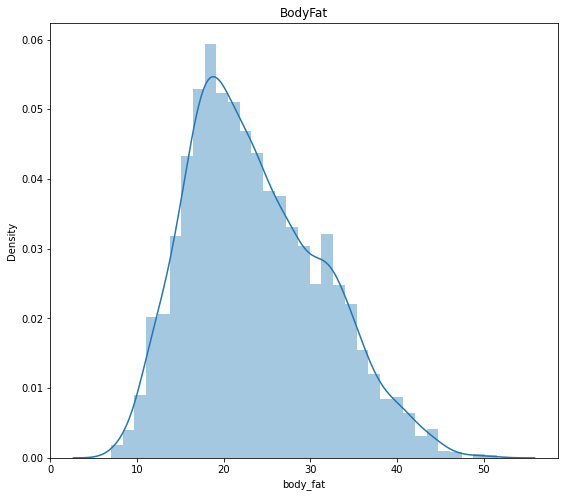

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('BodyFat')
sns.distplot(data['body_fat'])

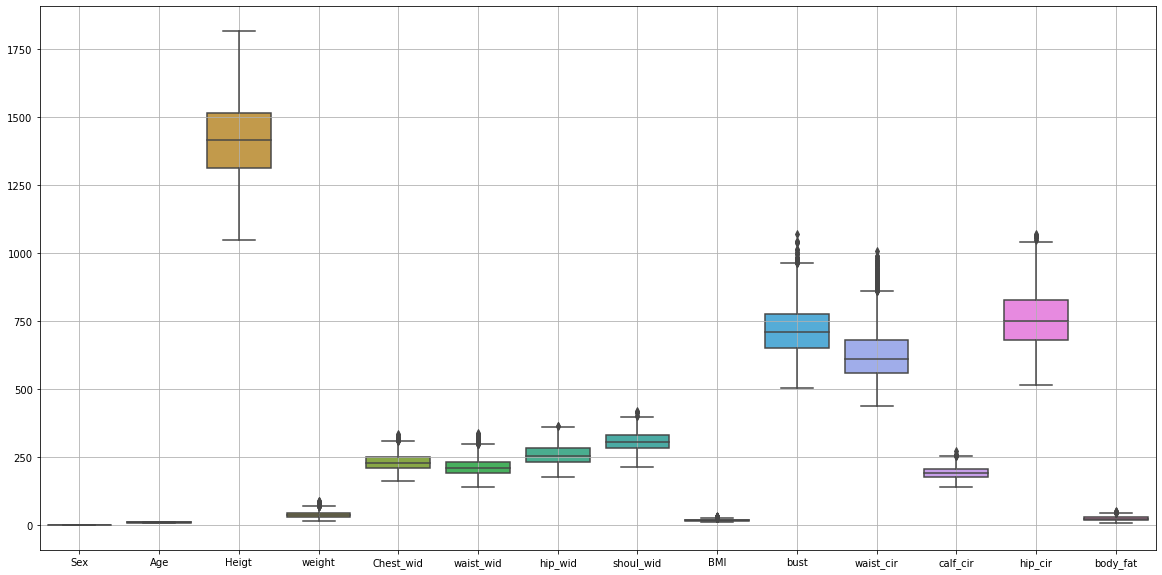

In [ ]:
plt.figure(figsize=(20,10), facecolor='white')
sns.boxplot(data=data)
plt.grid()
plt.show()

In [ ]:
Q1 = data[['Sex','Age','Heigt','weight','Chest_wid','waist_wid','hip_wid','shoul_wid','BMI','bust','waist_cir','calf_cir','hip_cir','body_fat']].quantile(q=0.25)
Q3 = data[['Sex','Age','Heigt','weight','Chest_wid','waist_wid','hip_wid','shoul_wid','BMI','bust','waist_cir','calf_cir','hip_cir','body_fat']].quantile(q=0.75)

In [ ]:
IQR = Q3-Q1
IQR


Sex            1.0
Age            3.0
Heigt        201.0
weight        16.7
Chest_wid     40.0
waist_wid     43.0
hip_wid       52.0
shoul_wid     47.0
BMI            4.3
bust         125.0
waist_cir    121.0
calf_cir      31.0
hip_cir      147.0
body_fat      11.2
dtype: float64

In [ ]:
#이상치 제거
IQR_df = data[(data['Sex'] <= Q3['Sex']+1.5*IQR['Sex']) & (data['Sex'] >= Q1['Sex']-1.5*IQR['Sex'])]
IQR_df = IQR_df[(IQR_df['Age'] <= Q3['Age']+1.5*IQR['Age']) & (IQR_df['Age'] >= Q1['Age']-1.5*IQR['Age'])]
IQR_df = IQR_df[(IQR_df['Heigt'] <= Q3['Heigt']+1.5*IQR['Heigt']) & (IQR_df['Heigt'] >= Q1['Heigt']-1.5*IQR['Heigt'])]
IQR_df = IQR_df[(IQR_df['weight'] <= Q3['weight']+1.5*IQR['weight']) & (IQR_df['weight'] >= Q1['weight']-1.5*IQR['weight'])]
IQR_df = IQR_df[(IQR_df['Chest_wid'] <= Q3['Chest_wid']+1.5*IQR['Chest_wid']) & (IQR_df['Chest_wid'] >= Q1['Chest_wid']-1.5*IQR['Chest_wid'])]
IQR_df = IQR_df[(IQR_df['waist_wid'] <= Q3['waist_wid']+1.5*IQR['waist_wid']) & (IQR_df['waist_wid'] >= Q1['waist_wid']-1.5*IQR['waist_wid'])]
IQR_df = IQR_df[(IQR_df['hip_wid'] <= Q3['hip_wid']+1.5*IQR['hip_wid']) & (IQR_df['hip_wid'] >= Q1['hip_wid']-1.5*IQR['hip_wid'])]
IQR_df = IQR_df[(IQR_df['shoul_wid'] <= Q3['shoul_wid']+1.5*IQR['shoul_wid']) & (IQR_df['shoul_wid'] >= Q1['shoul_wid']-1.5*IQR['shoul_wid'])]
IQR_df = IQR_df[(IQR_df['bust'] <= Q3['bust']+1.5*IQR['bust']) & (IQR_df['bust'] >= Q1['bust']-1.5*IQR['bust'])]
IQR_df = IQR_df[(IQR_df['waist_cir'] <= Q3['waist_cir']+1.5*IQR['waist_cir']) & (IQR_df['waist_cir'] >= Q1['waist_cir']-1.5*IQR['waist_cir'])]
IQR_df = IQR_df[(IQR_df['calf_cir'] <= Q3['calf_cir']+1.5*IQR['calf_cir']) & (IQR_df['calf_cir'] >= Q1['calf_cir']-1.5*IQR['calf_cir'])]
IQR_df = IQR_df[(IQR_df['hip_cir'] <= Q3['hip_cir']+1.5*IQR['hip_cir']) & (IQR_df['hip_cir'] >= Q1['hip_cir']-1.5*IQR['hip_cir'])]
IQR_df = IQR_df[(IQR_df['body_fat'] <= Q3['body_fat']+1.5*IQR['body_fat']) & (IQR_df['body_fat'] >= Q1['body_fat']-1.5*IQR['body_fat'])]

IQR_df = IQR_df[['Sex','Age','Heigt','weight','Chest_wid','waist_wid','hip_wid','shoul_wid','BMI','bust','waist_cir','calf_cir','hip_cir','body_fat']]

print('original_df :', len(data))
print('IQR_df :', len(IQR_df))

original_df : 4270
IQR_df : 4159


In [ ]:
IQR_df

,Sex,Age,Heigt,weight,Chest_wid,waist_wid,hip_wid,shoul_wid,BMI,bust,waist_cir,calf_cir,hip_cir,body_fat
0,1,7,1330.000000,31.6,206.000000,198.000000,239.0,276.0,17.9,670.0,624.000000,181.0,727.0,29.3
1,1,7,1160.000000,19.4,179.000000,148.000000,198.0,235.0,14.4,581.0,498.000000,150.0,572.0,12.7
2,1,7,1243.000000,23.6,208.000000,195.000000,216.0,286.0,15.4,617.0,543.000000,161.0,627.0,16.3
3,1,7,1144.000000,19.9,206.000000,173.000000,200.0,260.0,15.3,578.0,500.000000,160.0,602.0,20.2
4,1,7,1277.000000,37.1,235.930615,238.363337,255.0,310.0,22.7,735.0,703.480356,199.0,770.0,34.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,0,13,1632.000000,52.1,252.000000,215.000000,320.0,335.0,19.6,804.0,664.000000,212.0,916.0,24.2
4872,0,13,1394.498785,30.1,214.000000,196.000000,253.0,296.0,15.6,693.0,574.000000,182.0,728.0,20.9
4873,0,13,1527.000000,48.0,242.000000,222.000000,304.0,335.0,20.5,788.0,662.000000,209.0,844.0,27.9
4874,0,13,1457.000000,34.6,217.000000,206.000000,268.0,315.0,16.2,675.0,600.000000,194.0,748.0,19.9


In [ ]:
data = IQR_df

In [ ]:
data

,Sex,Age,Heigt,weight,Chest_wid,waist_wid,hip_wid,shoul_wid,BMI,bust,waist_cir,calf_cir,hip_cir,body_fat
0,1,7,1330.000000,31.6,206.000000,198.000000,239.0,276.0,17.9,670.0,624.000000,181.0,727.0,29.3
1,1,7,1160.000000,19.4,179.000000,148.000000,198.0,235.0,14.4,581.0,498.000000,150.0,572.0,12.7
2,1,7,1243.000000,23.6,208.000000,195.000000,216.0,286.0,15.4,617.0,543.000000,161.0,627.0,16.3
3,1,7,1144.000000,19.9,206.000000,173.000000,200.0,260.0,15.3,578.0,500.000000,160.0,602.0,20.2
4,1,7,1277.000000,37.1,235.930615,238.363337,255.0,310.0,22.7,735.0,703.480356,199.0,770.0,34.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,0,13,1632.000000,52.1,252.000000,215.000000,320.0,335.0,19.6,804.0,664.000000,212.0,916.0,24.2
4872,0,13,1394.498785,30.1,214.000000,196.000000,253.0,296.0,15.6,693.0,574.000000,182.0,728.0,20.9
4873,0,13,1527.000000,48.0,242.000000,222.000000,304.0,335.0,20.5,788.0,662.000000,209.0,844.0,27.9
4874,0,13,1457.000000,34.6,217.000000,206.000000,268.0,315.0,16.2,675.0,600.000000,194.0,748.0,19.9


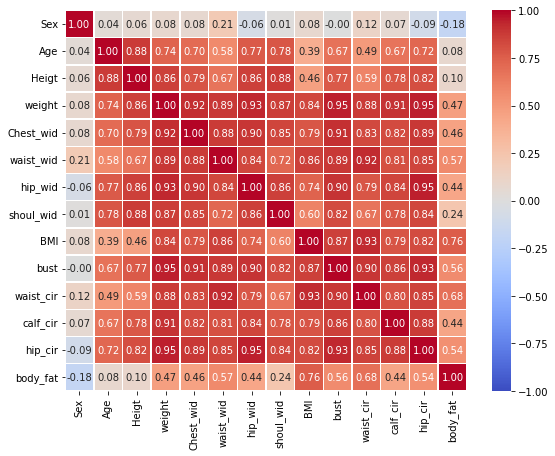

In [ ]:
fig = plt.figure(figsize=(9,7), facecolor='white')
sns.heatmap(data.corr(), vmin = -1, annot=True,linewidth=0.5,  annot_kws={"fontsize":10, 'rotation':0} ,fmt = '.2f', cmap = 'coolwarm')

In [ ]:
data.drop(columns=['Sex','Age','Heigt','shoul_wid'],axis=1,inplace=True)

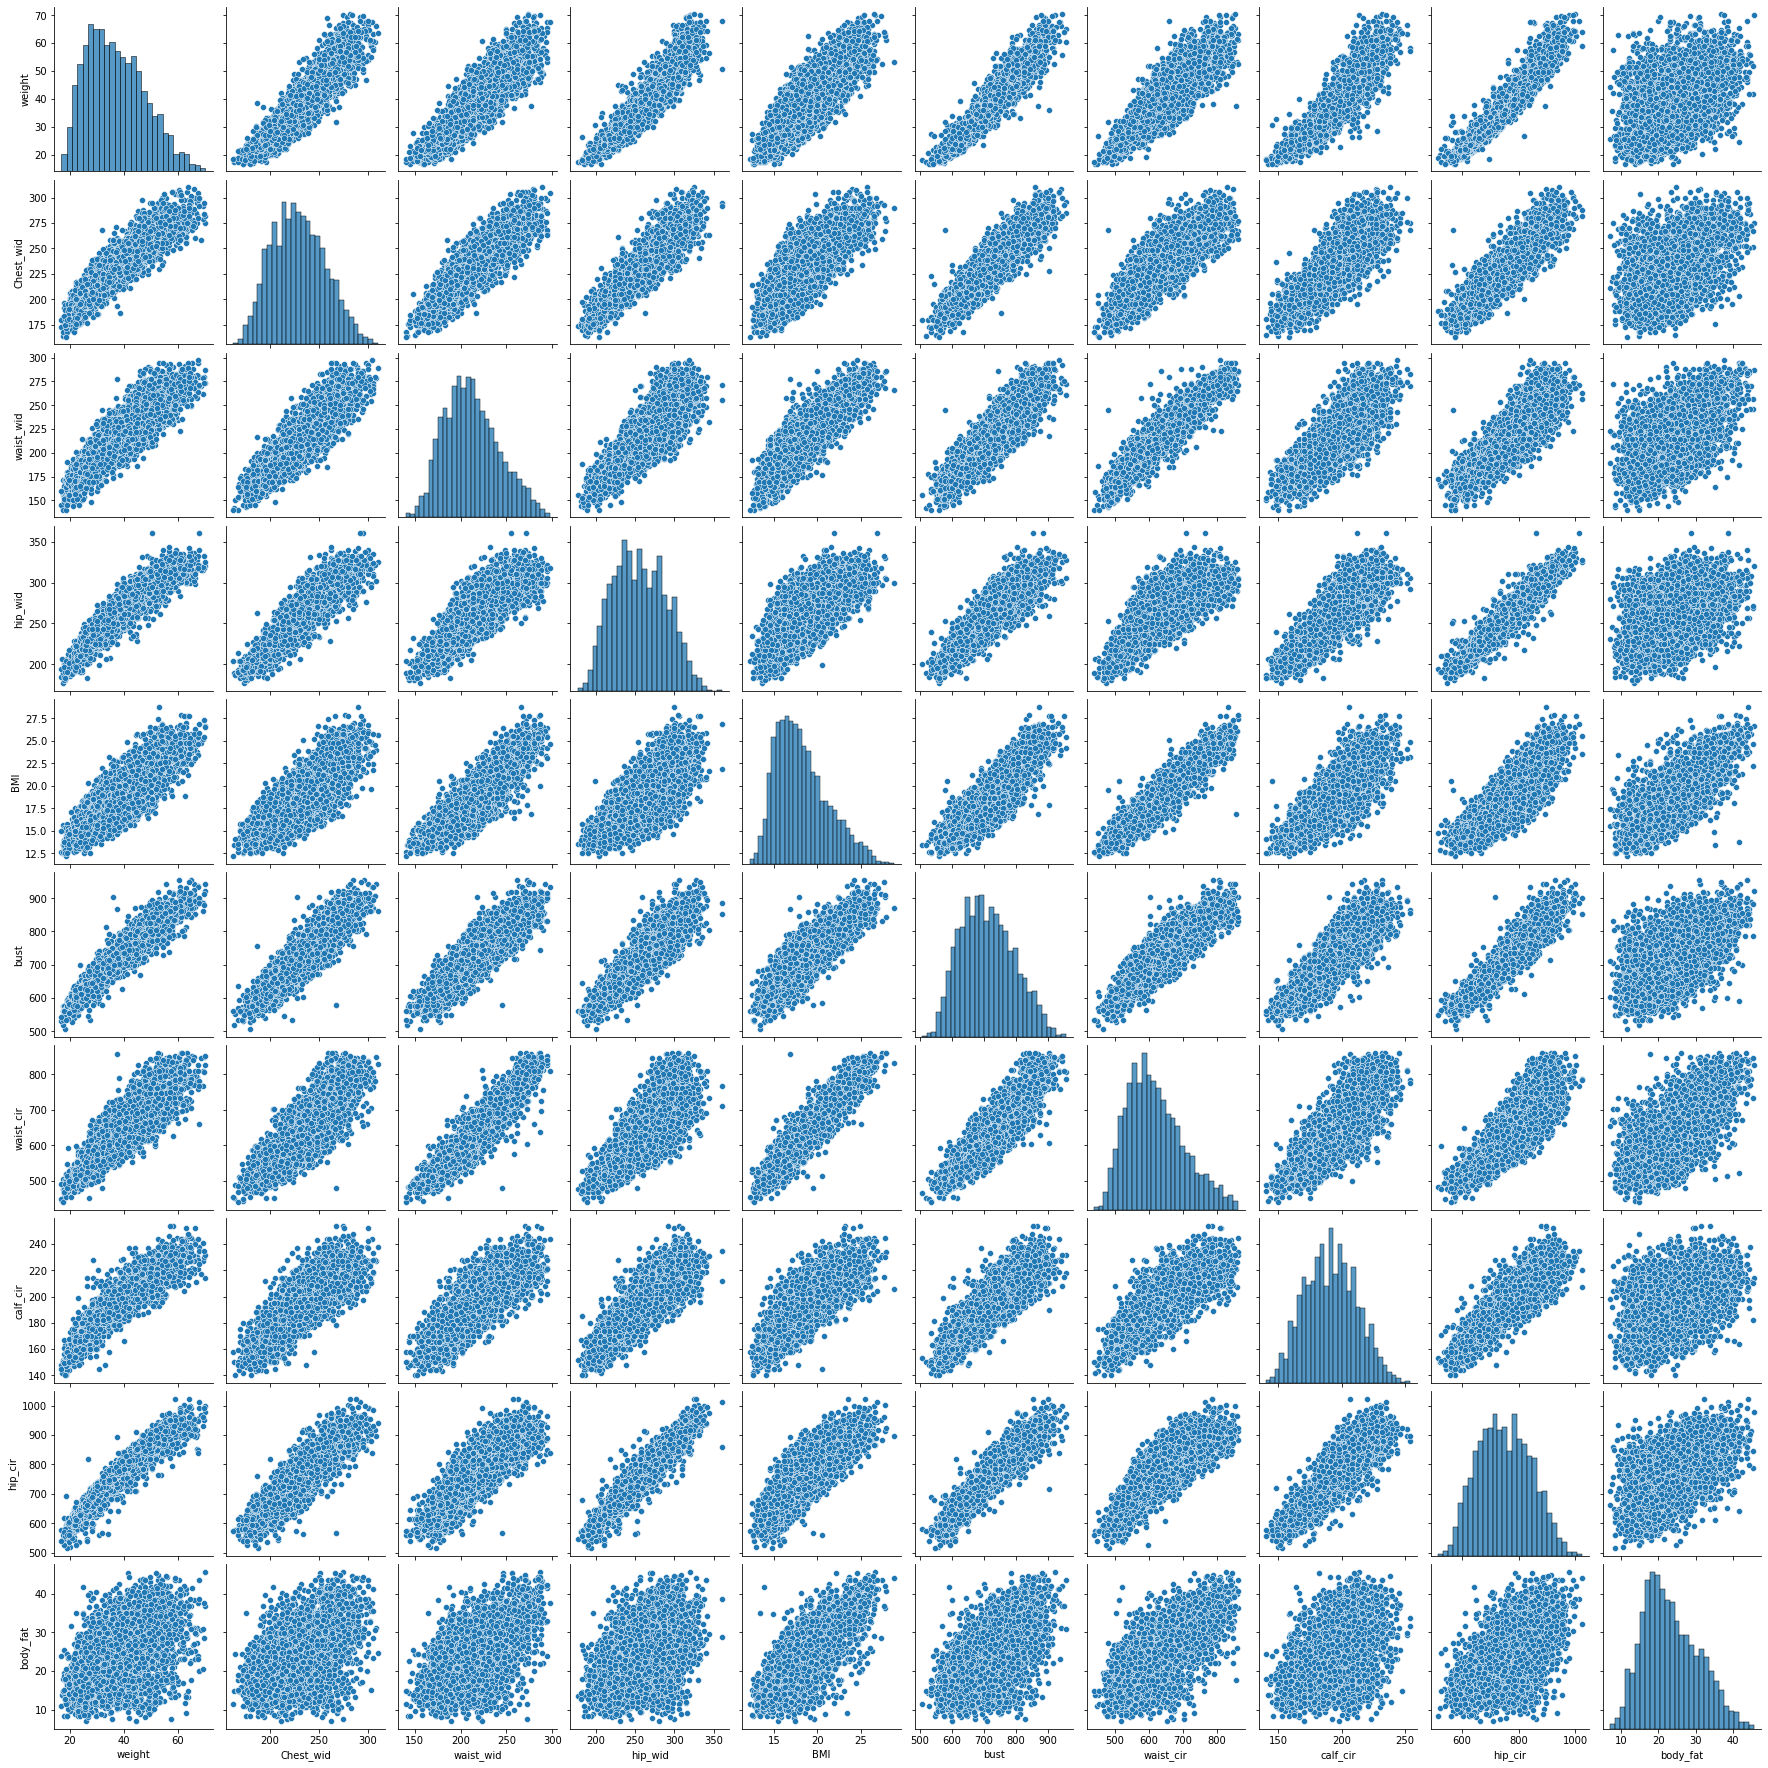

In [ ]:
sns.pairplot(data)